## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Loading And Formatting Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [5]:
train = train.dropna()
test = test.dropna()

In [6]:
X_train = train.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
X_test = test.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
y_train = train['Survived']
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,38.0,1,0,71.2833,1.0
3,1,1,35.0,1,0,53.1000,0.0
6,1,0,54.0,0,0,51.8625,0.0
10,3,1,4.0,1,1,16.7000,0.0
11,1,1,58.0,0,0,26.5500,0.0


In [7]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
12,1,1,23.0,1,0,82.2667,0
14,1,1,47.0,1,0,61.1750,0
24,1,1,48.0,1,3,262.3750,1
26,1,1,22.0,0,1,61.9792,1
28,1,0,41.0,0,0,30.5000,0


## Analyzing Data

In [8]:
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,0.148495,-0.089136,0.025205,0.030933,-0.083488,-0.051454,0.029740,-0.054246
Survived,0.148495,1.000000,-0.034542,0.532418,-0.254085,0.106346,0.023582,0.134241,0.083231
Pclass,-0.089136,-0.034542,1.000000,0.046181,-0.306514,-0.103592,0.047496,-0.315235,-0.235027
Sex,0.025205,0.532418,0.046181,1.000000,-0.184969,0.104291,0.089581,0.130433,0.060862
Age,0.030933,-0.254085,-0.306514,-0.184969,1.000000,-0.156162,-0.271271,-0.092424,0.088112
SibSp,-0.083488,0.106346,-0.103592,0.104291,-0.156162,1.000000,0.255346,0.286433,0.015962
Parch,-0.051454,0.023582,0.047496,0.089581,-0.271271,0.255346,1.000000,0.389740,-0.097495
Fare,0.029740,0.134241,-0.315235,0.130433,-0.092424,0.286433,0.389740,1.000000,0.233452
Embarked,-0.054246,0.083231,-0.235027,0.060862,0.088112,0.015962,-0.097495,0.233452,1.000000


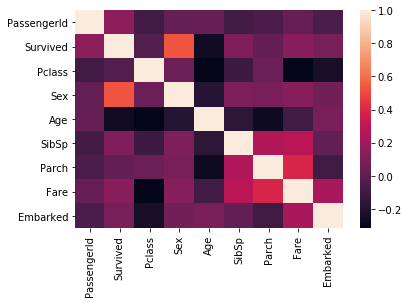

In [9]:
sns.heatmap(train.corr());

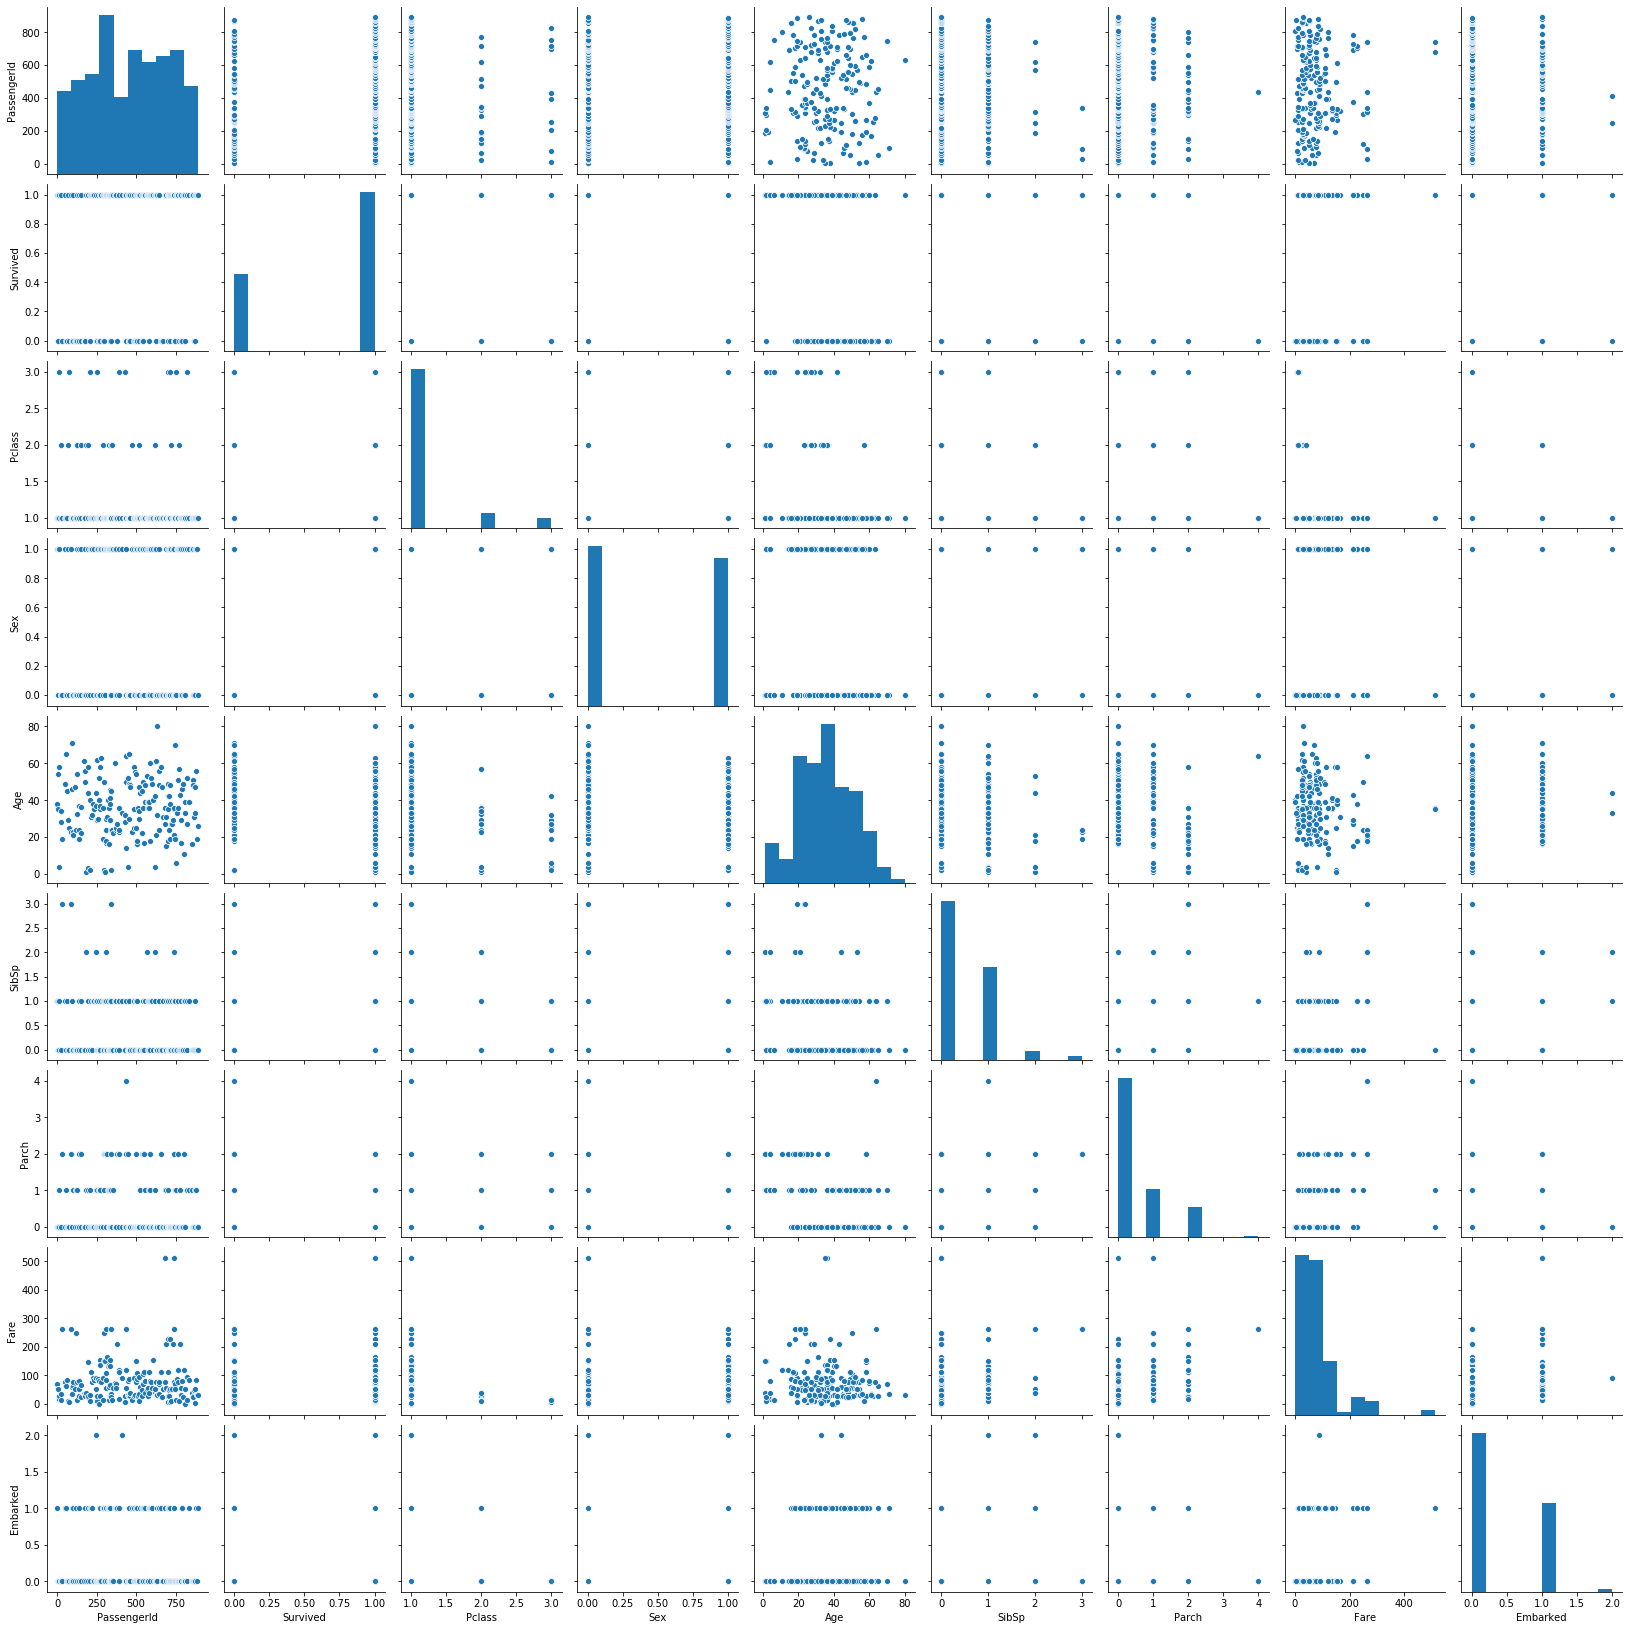

In [10]:
sns.pairplot(train);

# Decision Tree vs Neural Network

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=19)

In [12]:
tree = DecisionTreeClassifier(max_leaf_nodes=8, random_state=19)

In [13]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=19, splitter='best')

In [14]:
predictions = tree.predict(X_val)

In [15]:
accuracy = accuracy_score(y_true=y_val, y_pred=predictions)

In [16]:
accuracy

0.8260869565217391

In [17]:
predict_tree = tree.predict(X_test)
predict_tree

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [18]:
X_test = X_test.drop(['Survived'], axis=1)

KeyError: "['Survived'] not found in axis"

In [ ]:
X_test['Survived'] = predict_tree
X_test